In [0]:
import pandas as pd
import numpy as np
import tensorflow as tf
import nltk



In [0]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [3]:
link= "https://drive.google.com/open?id=1_qSWryyrWww_xTNiajrJYfGRn_ZVOae8"
fluff, id = link.split('=')
print (id)

1_qSWryyrWww_xTNiajrJYfGRn_ZVOae8


In [0]:
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('Fake.csv')  


In [5]:
df_fake=pd.read_csv('Fake.csv')
df_fake['Fake']=1
df_fake.head(20)

title  ... Fake
0    Donald Trump Sends Out Embarrassing New Year’...  ...    1
1    Drunk Bragging Trump Staffer Started Russian ...  ...    1
2    Sheriff David Clarke Becomes An Internet Joke...  ...    1
3    Trump Is So Obsessed He Even Has Obama’s Name...  ...    1
4    Pope Francis Just Called Out Donald Trump Dur...  ...    1
5    Racist Alabama Cops Brutalize Black Boy While...  ...    1
6    Fresh Off The Golf Course, Trump Lashes Out A...  ...    1
7    Trump Said Some INSANELY Racist Stuff Inside ...  ...    1
8    Former CIA Director Slams Trump Over UN Bully...  ...    1
9    WATCH: Brand-New Pro-Trump Ad Features So Muc...  ...    1
10   Papa John’s Founder Retires, Figures Out Raci...  ...    1
11   WATCH: Paul Ryan Just Told Us He Doesn’t Care...  ...    1
12   Bad News For Trump — Mitch McConnell Says No ...  ...    1
13   WATCH: Lindsey Graham Trashes Media For Portr...  ...    1
14   Heiress To Disney Empire Knows GOP Scammed Us...  ...    1
15   Tone Deaf Trump: Congrats Rep. Scalise On Los...  ...    1
16   The Internet Brutally Mocks Disney’s New Trum...  ...    1
17   Mueller Spokesman Just F-cked Up Donald Trump...  ...    1
18   SNL Hilariously Mocks Accused Child Molester ...  ...    1
19   Republican Senator Gets Dragged For Going Aft...  ...    1

[20 rows x 5 columns]

In [6]:
link= "https://drive.google.com/open?id=1TGzFXxdgS2ol_L-SYgehL_CQitgQK59C"
fluff, id = link.split('=')
print (id)

1TGzFXxdgS2ol_L-SYgehL_CQitgQK59C


In [0]:
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('True.csv')  

In [8]:
df_real=pd.read_csv('True.csv')
df_real['Fake']=0
df_real.head(20)


title  ... Fake
0   As U.S. budget fight looms, Republicans flip t...  ...    0
1   U.S. military to accept transgender recruits o...  ...    0
2   Senior U.S. Republican senator: 'Let Mr. Muell...  ...    0
3   FBI Russia probe helped by Australian diplomat...  ...    0
4   Trump wants Postal Service to charge 'much mor...  ...    0
5   White House, Congress prepare for talks on spe...  ...    0
6   Trump says Russia probe will be fair, but time...  ...    0
7   Factbox: Trump on Twitter (Dec 29) - Approval ...  ...    0
8          Trump on Twitter (Dec 28) - Global Warming  ...    0
9   Alabama official to certify Senator-elect Jone...  ...    0
10  Jones certified U.S. Senate winner despite Moo...  ...    0
11  New York governor questions the constitutional...  ...    0
12  Factbox: Trump on Twitter (Dec 28) - Vanity Fa...  ...    0
13     Trump on Twitter (Dec 27) - Trump, Iraq, Syria  ...    0
14  Man says he delivered manure to Mnuchin to pro...  ...    0
15  Virginia officials postpone lottery drawing to...  ...    0
16  U.S. lawmakers question businessman at 2016 Tr...  ...    0
17  Trump on Twitter (Dec 26) - Hillary Clinton, T...  ...    0
18  U.S. appeals court rejects challenge to Trump ...  ...    0
19  Treasury Secretary Mnuchin was sent gift-wrapp...  ...    0

[20 rows x 5 columns]

In [9]:
df_real.shape

(21417, 5)

In [10]:
df_fake.shape

(23481, 5)

In [11]:
df_fake['subject'].unique()

array(['News', 'politics', 'Government News', 'left-news', 'US_News',
       'Middle-east'], dtype=object)

In [12]:
df_real['subject'].unique()

array(['politicsNews', 'worldnews'], dtype=object)

In [13]:
df_fake['subject'].value_counts()

News               9050
politics           6841
left-news          4459
Government News    1570
US_News             783
Middle-east         778
Name: subject, dtype: int64

In [14]:
df_real['subject'].value_counts()

politicsNews    11272
worldnews       10145
Name: subject, dtype: int64

In [15]:
df=pd.concat([df_real,df_fake])
df.head()

title  ... Fake
0  As U.S. budget fight looms, Republicans flip t...  ...    0
1  U.S. military to accept transgender recruits o...  ...    0
2  Senior U.S. Republican senator: 'Let Mr. Muell...  ...    0
3  FBI Russia probe helped by Australian diplomat...  ...    0
4  Trump wants Postal Service to charge 'much mor...  ...    0

[5 rows x 5 columns]

# Data Cleaning

In [16]:
import string
import matplotlib.pyplot as plt
import seaborn as sns
import re

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [17]:
df['content']=df['title']+' '+df['text']
df.head()

title  ...                                            content
0  As U.S. budget fight looms, Republicans flip t...  ...  As U.S. budget fight looms, Republicans flip t...
1  U.S. military to accept transgender recruits o...  ...  U.S. military to accept transgender recruits o...
2  Senior U.S. Republican senator: 'Let Mr. Muell...  ...  Senior U.S. Republican senator: 'Let Mr. Muell...
3  FBI Russia probe helped by Australian diplomat...  ...  FBI Russia probe helped by Australian diplomat...
4  Trump wants Postal Service to charge 'much mor...  ...  Trump wants Postal Service to charge 'much mor...

[5 rows x 6 columns]

In [18]:
del df['title']
del df['text']
del df['subject']
del df['date']
df.head()

Fake                                            content
0     0  As U.S. budget fight looms, Republicans flip t...
1     0  U.S. military to accept transgender recruits o...
2     0  Senior U.S. Republican senator: 'Let Mr. Muell...
3     0  FBI Russia probe helped by Australian diplomat...
4     0  Trump wants Postal Service to charge 'much mor...

In [19]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [0]:
stop = set(nltk.corpus.stopwords.words('english'))
punctuation = list(string.punctuation)
stop.update(punctuation)

In [0]:
from bs4 import BeautifulSoup
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

#Removing the square brackets
def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)
# Removing URL's
def remove_between_square_brackets(text):
    return re.sub(r'http\S+', '', text)
#Removing the stopwords from text
def remove_stopwords(text):
    final_text = []
    for i in text.split():
        if i.strip().lower() not in stop:
            final_text.append(i.strip())
    return " ".join(final_text)
#Removing the noisy text
def denoise_text(text):
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    text = remove_stopwords(text)
    return text


In [22]:
#Apply function on review column
df['content']=df['content'].apply(denoise_text)
df.head()

Fake                                            content
0     0  U.S. budget fight looms, Republicans flip fisc...
1     0  U.S. military accept transgender recruits Mond...
2     0  Senior U.S. Republican senator: 'Let Mr. Muell...
3     0  FBI Russia probe helped Australian diplomat ti...
4     0  Trump wants Postal Service charge 'much more' ...

# Exploratory Data Analysis

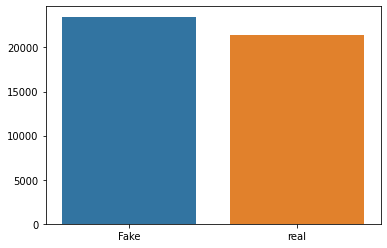

In [23]:
sns.barplot(x=['Fake','real'],y=[df['Fake'].value_counts()[1],df['Fake'].value_counts()[0]])

In [24]:
import sys
!{sys.executable} -m pip install textblob


In [0]:
df=df.reset_index()

In [0]:
from textblob import TextBlob
sen=df['content'][1]
sentiment1=TextBlob(sen).sentiment

In [27]:
sentiment1.polarity

0.10663780663780664

In [28]:
df['sentiment']=[TextBlob(x).sentiment.polarity for x in df['content']]
df.head()

index  Fake                                            content  sentiment
0      0     0  U.S. budget fight looms, Republicans flip fisc...   0.036979
1      1     0  U.S. military accept transgender recruits Mond...   0.106638
2      2     0  Senior U.S. Republican senator: 'Let Mr. Muell...   0.119927
3      3     0  FBI Russia probe helped Australian diplomat ti...   0.046650
4      4     0  Trump wants Postal Service charge 'much more' ...   0.057890

In [0]:
real_news_sentiment=df[df['Fake']==0]['sentiment']
fake_news_sentiment=df[df['Fake']==1]['sentiment']

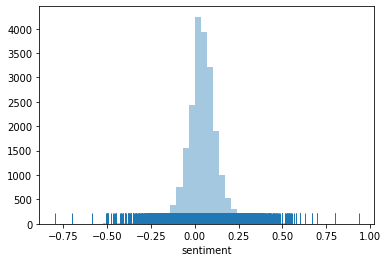

In [30]:
sns.distplot(real_news_sentiment,kde=False,rug=True)

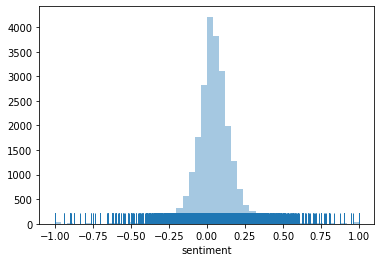

In [31]:
sns.distplot(fake_news_sentiment,kde=False,rug=True)

In [32]:
import sys
!{sys.executable} -m pip install wordcloud

In [0]:
from nltk.corpus import wordnet
from wordcloud import WordCloud, STOPWORDS

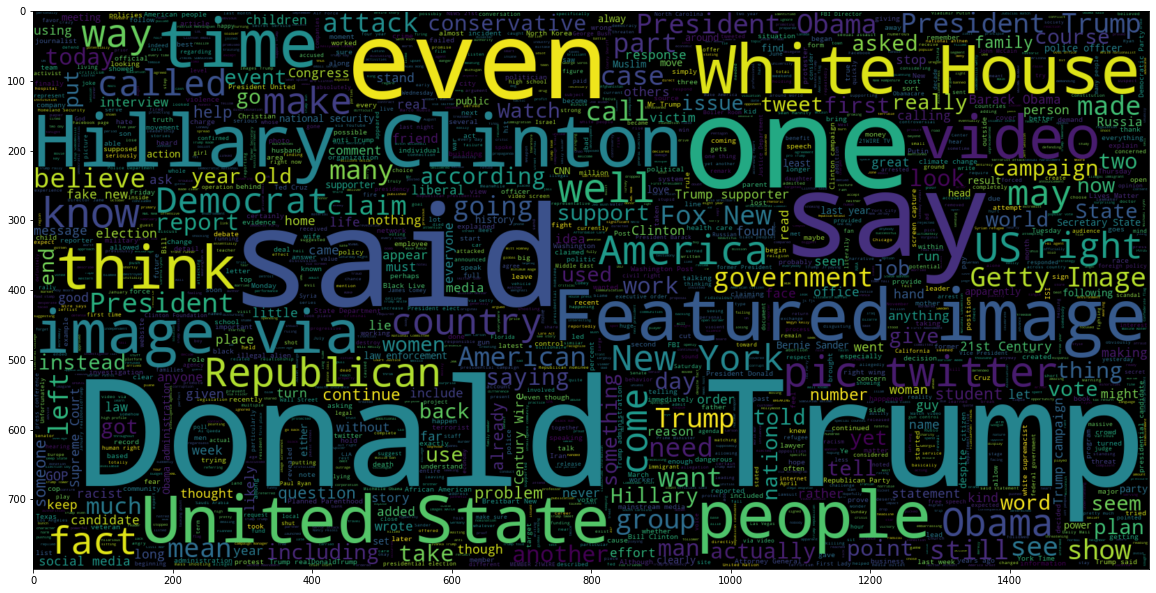

In [34]:
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800 , stopwords = STOPWORDS).generate(" ".join(df[df.Fake == 1].content))
plt.imshow(wc , interpolation = 'bilinear')

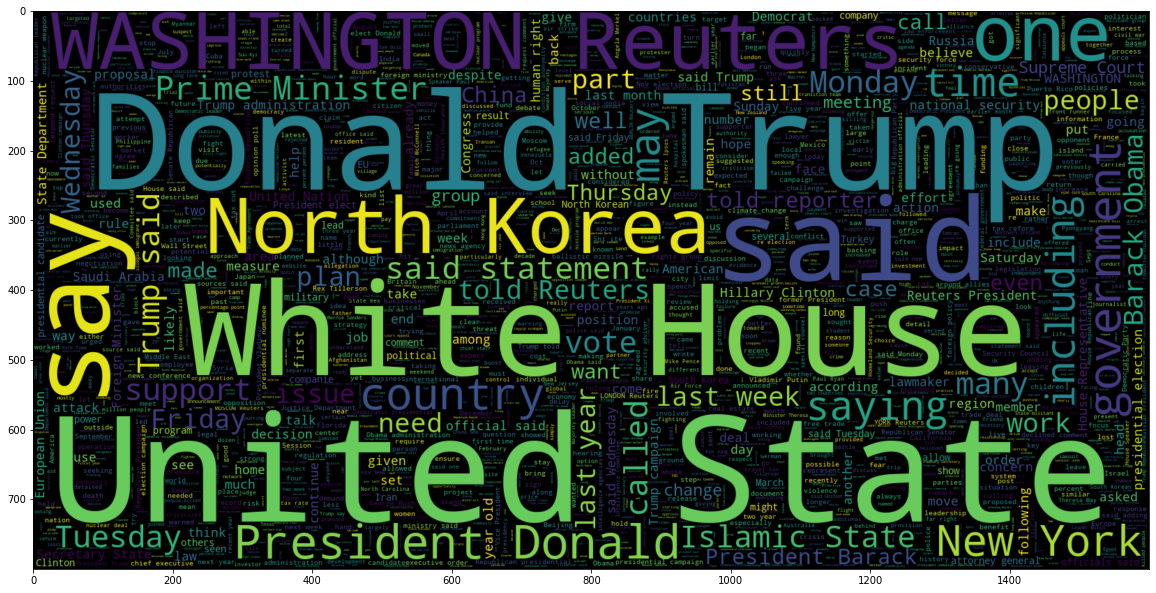

In [35]:
plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800 , stopwords = STOPWORDS).generate(" ".join(df[df.Fake == 0].content))
plt.imshow(wc , interpolation = 'bilinear')

In [36]:
from sklearn.feature_extraction.text import CountVectorizer
fake=df[df['Fake']==1]['content']
fake

21417    Donald Trump Sends Embarrassing New Year’s Eve...
21418    Drunk Bragging Trump Staffer Started Russian C...
21419    Sheriff David Clarke Becomes Internet Joke Thr...
21420    Trump Obsessed Even Obama’s Name Coded Website...
21421    Pope Francis Called Donald Trump Christmas Spe...
                               ...                        
44893    McPain: John McCain Furious Iran Treated US Sa...
44894    JUSTICE? Yahoo Settles E-mail Privacy Class-ac...
44895    Sunnistan: US Allied ‘Safe Zone’ Plan Take Ter...
44896    Blow $700 Million: Al Jazeera America Finally ...
44897    10 U.S. Navy Sailors Held Iranian Military – S...
Name: content, Length: 23481, dtype: object

In [0]:
stemmer=nltk.PorterStemmer()
def lemetize(text):
    final=[]
    for i in text.split():
        if i.strip().lower() not in stop:
            word=stemmer.stem(i.strip())
            final.append(word)
    return ' '.join(final)

In [0]:
df['stemmed_content']=df['content'].apply(lemetize)

In [39]:
df.head()

index  Fake  ... sentiment                                    stemmed_content
0      0     0  ...  0.036979  u.s. budget fight looms, republican flip fisca...
1      1     0  ...  0.106638  u.s. militari accept transgend recruit monday:...
2      2     0  ...  0.119927  senior u.s. republican senator: 'let mr. muell...
3      3     0  ...  0.046650  fbi russia probe help australian diplomat tip-...
4      4     0  ...  0.057890  trump want postal servic charg 'much more' ama...

[5 rows x 5 columns]

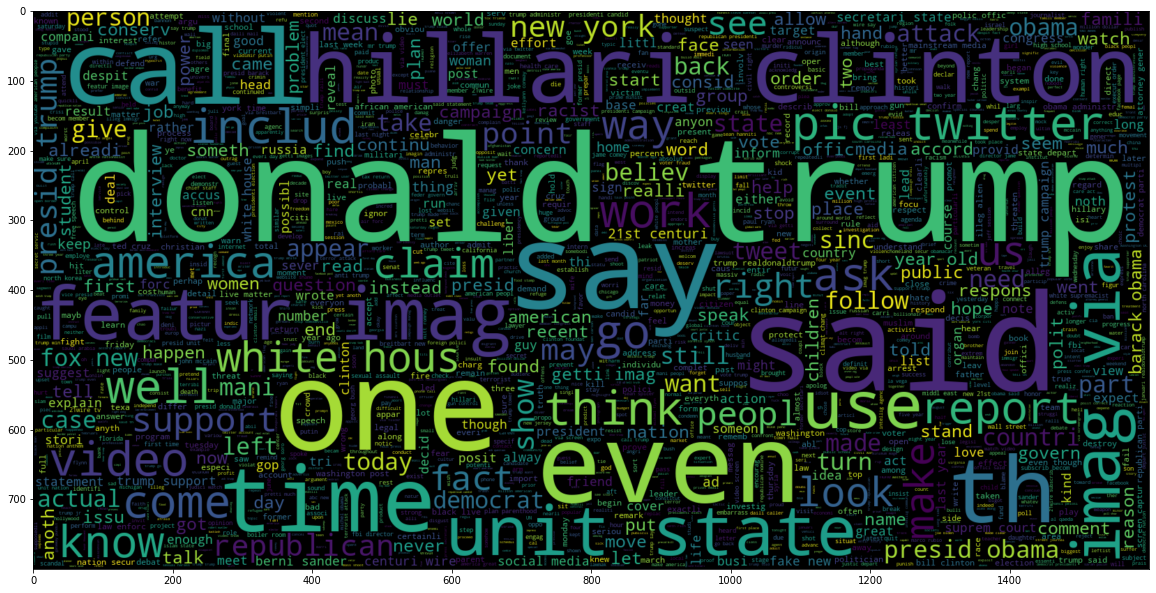

In [40]:
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800 , stopwords = STOPWORDS).generate(" ".join(df[df.Fake == 1].stemmed_content))
plt.imshow(wc , interpolation = 'bilinear')

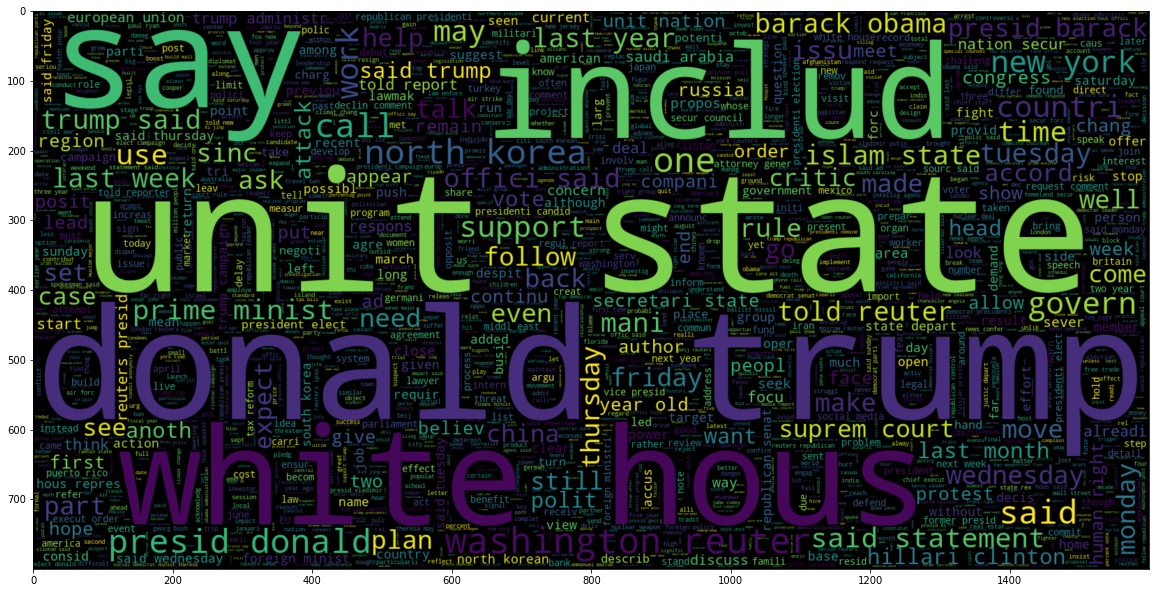

In [41]:
plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800 , stopwords = STOPWORDS).generate(" ".join(df[df.Fake == 0].stemmed_content))
plt.imshow(wc , interpolation = 'bilinear')

# Model Training

In [0]:
from sklearn.model_selection import train_test_split
y=df['Fake']
X=df['content']

X_train, X_test , y_train, y_test=train_test_split(X,y, random_state=2,test_size=.2)

In [0]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import regularizers

In [0]:
num_words = 20000
tokenizer = Tokenizer(num_words=num_words)
tokenizer.fit_on_texts(X_train)

In [0]:

word_index = tokenizer.word_index
vocab_size=len(word_index)

In [0]:
X_token = tokenizer.texts_to_sequences(X_train)
X_token = pad_sequences(X_token, maxlen=700, padding='post', truncating='post')

In [0]:
import tensorflow as tf

In [0]:
y_train = np.array(y_train)

In [57]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size+1, 100, input_length=700),
    tf.keras.layers.Dropout(.2),
    tf.keras.layers.LSTM(32,return_sequences=True),
    tf.keras.layers.Conv1D(32, kernel_size=3,padding='same', activation='relu'),
    tf.keras.layers.MaxPooling1D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(.2),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 700, 100)          12982600  
_________________________________________________________________
dropout_2 (Dropout)          (None, 700, 100)          0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 700, 32)           17024     
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 700, 32)           3104      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 350, 32)           0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 11200)             0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 11200)            

In [58]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
history=model.fit(X_token,y_train,batch_size=512,epochs=15,validation_split=0.2)

Epoch 1/15
57/57 [==============================] - 15s 257ms/step - loss: 0.3415 - accuracy: 0.8251 - val_loss: 0.0235 - val_accuracy: 0.9910
Epoch 2/15
57/57 [==============================] - 14s 244ms/step - loss: 0.0088 - accuracy: 0.9979 - val_loss: 0.0108 - val_accuracy: 0.9964
Epoch 3/15
57/57 [==============================] - 14s 248ms/step - loss: 7.7164e-04 - accuracy: 0.9999 - val_loss: 0.0078 - val_accuracy: 0.9982
Epoch 4/15
57/57 [==============================] - 14s 246ms/step - loss: 2.6136e-04 - accuracy: 1.0000 - val_loss: 0.0083 - val_accuracy: 0.9982
Epoch 5/15
57/57 [==============================] - 14s 247ms/step - loss: 2.2796e-04 - accuracy: 1.0000 - val_loss: 0.0091 - val_accuracy: 0.9979
Epoch 6/15
57/57 [==============================] - 14s 244ms/step - loss: 1.8250e-04 - accuracy: 1.0000 - val_loss: 0.0098 - val_accuracy: 0.9978
Epoch 7/15
57/57 [==============================] - 14s 246ms/step - loss: 1.3857e-04 - accuracy: 1.0000 - val_loss: 0.0105 - 

<Figure size 432x288 with 0 Axes>

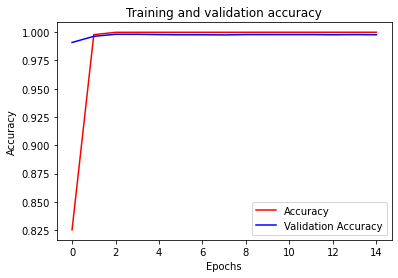

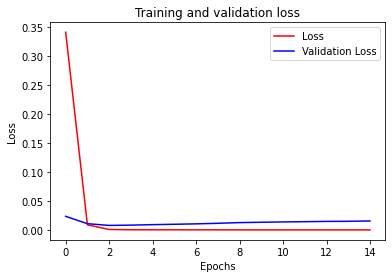

<Figure size 432x288 with 0 Axes>

In [59]:
import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r')
plt.plot(epochs, val_acc, 'b')
plt.title('Training and validation accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["Accuracy", "Validation Accuracy"])

plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r')
plt.plot(epochs, val_loss, 'b')
plt.title('Training and validation loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["Loss", "Validation Loss"])

plt.figure()


In [60]:
X_test_token = tokenizer.texts_to_sequences(X_test)
X_test_token = pad_sequences(X_test_token, maxlen=700, padding='post', truncating='post')
y_test = np.array(y_test)
model.evaluate(X_test_token,y_test)

281/281 [==============================] - 3s 12ms/step - loss: 0.0094 - accuracy: 0.9986


[0.009405202232301235, 0.9985523223876953]